In [2]:
#DONT RUN THIS CODE. IT IS ALREADY INSTALLED AND CLONED!!!
# !git clone https://github.com/ultralytics/yolov5  
# %cd yolov5
# %pip install -qr requirements.txt 
# %pip install -q roboflow

C:\Users\Gebruiker\Documents\YoloV5\yolov5\yolov5


Cloning into 'yolov5'...


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!pip install -qr yolov5/requirements.txt 

In [1]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cpu (CPU)


In [2]:
dataset = r'D:\Yolov5Course\datasets\ProjectGroup6Dataset-1'

In [6]:
#python yolov5\train.py --img 640 --batch 16 --epochs 50 --data C:\Users\Gebruiker\Documents\YoloV5\yolov5\dataset/data.yaml --weights yolov5s.pt --workers 2 --cache


^C
Done training


In [5]:
IMAGE_PATH = r'D:\YoloV5Course\datasets\ProjectGroup6Dataset-1\valid\images\IMG_20230321_172006_jpg.rf.4f4e9dfce6f565aff528d7146eda3b56.jpg'

In [3]:
model_name = r'D:\YoloV5Course\yolov5\runs\train\exp\weights\best.pt'

In [13]:
# IMAGE CAPTURE

import torch
import cv2
from numpy import mean
import cv2
import time
import numpy as np

model = torch.hub.load('yolov5', 'custom', path=model_name, force_reload=True, source='local')

pixel_ratio_array = []
paddle = "paddle"

img = cv2.imread(IMAGE_PATH)
img = cv2.resize(img,(900,750))

result = model(img)

df = result.pandas().xyxy[0]
df_sorted = df.sort_values('name')

list_of_lables = []

y_min_paddle = 0
y_min_person = 0
pixel_to_cm = 0

for ind in df_sorted.index:
    
    x1, y1 = int(df['xmin'][ind]), int(df['ymin'][ind])
    x2, y2 = int(df['xmax'][ind]), int(df['ymax'][ind])
    label = df['name'][ind]
    cv2.rectangle(img,(x1,y1), (x2,y2), (255,0,0),2)
    cv2.putText(img,label,(x1,y1-5), cv2.FONT_HERSHEY_PLAIN, 2,(255,0,0),2) 
    list_of_lables.append(label)
    
    if paddle in list_of_lables:
        
        if label == "paddle":

            paddle_cm = 22.5
    
            paddle_height = int(df['ymax'][ind]) - int(df['ymin'][ind])

            pixel_to_cm = paddle_height / paddle_cm

            cm_ORG = (int(x1+120), int(y1-5))

            img = cv2.putText(img, str(paddle_cm)[:4] + ' CM', cm_ORG, cv2.FONT_HERSHEY_PLAIN, 1.5, (255,0,0), 2)
            
            y_min_paddle = int(df['ymin'][ind])
            y_min_person = int(df['ymin'][1])

            paddle_to_ground_px = y_min_paddle - y_min_person

            paddle_to_ground_cm = paddle_to_ground_px / pixel_to_cm

            cm_DST = (int(x1+60), int(y1+250))

            img = cv2.putText(img, str(paddle_to_ground_cm)[:3] + ' CM', cm_DST, cv2.FONT_HERSHEY_PLAIN, 1.5, (255,0,0), 2)
          
        if label == "person":
            
            person_height = int(df['ymax'][ind]) - int(df['ymin'][ind])

            object_cm = person_height / pixel_to_cm

            cm_ORG = (int(x1+120), int(y1-5))

            img = cv2.putText(img, str(object_cm)[:3] + ' CM', cm_ORG, cv2.FONT_HERSHEY_PLAIN, 1.5, (255,0,0), 2)     
        
cv2.imshow('IMAGE',img)
cv2.waitKey(0)

YOLOv5  v7.0-122-g78a90c96 Python-3.9.16 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


-1

In [26]:
# VIDEO CAPTURE

import torch
import cv2
from numpy import mean
import cv2
import time
import numpy as np

model = torch.hub.load('yolov5', 'custom', path=model_name, force_reload=True, source='local')

paddle = "paddle"
person = "person"

paddle_cm_width = 35
paddle_cm_height = 22.5

y_min_paddle = 0
y_max_person = 0

pixel_to_cm_height = 0

paddle_to_ground_cm = 0

vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()
    list_of_lables = []
    
    result = model(frame)

    df = result.pandas().xyxy[0]
    df_sorted = df.sort_values('name')

    for ind in df_sorted.index:
        xMin, yMin = int(df['xmin'][ind]), int(df['ymin'][ind])
        xMax, yMax = int(df['xmax'][ind]), int(df['ymax'][ind])
        label = df['name'][ind]
        cv2.rectangle(frame,(xMin,yMin), (xMax,yMax), (255,0,0),2)
        cv2.putText(frame,label,(xMin,yMin-5), cv2.FONT_HERSHEY_PLAIN, 1.2,(255,0,0),2)
        list_of_lables.append(label)
        
        if label == "paddle":
            paddle_width = xMax - xMin
            paddle_height = yMax - yMin
        else: 
            person_height = yMax - yMin
        
        if paddle in list_of_lables:
            if label == "paddle":

                pixel_to_cm_width = paddle_width / paddle_cm_width
                pixel_to_cm_height = paddle_height / paddle_cm_height

                cm_ORG = (int(xMin+100), int(yMin-5))
                
                cv2.putText(frame, str(paddle_cm_width)[:3] + ' CM', cm_ORG, cv2.FONT_HERSHEY_PLAIN, 1.2, (255,0, 0), 2)
                
                cm_DST_to_ground = int(10), int(30)
                
                cv2.putText(frame, 'Paddle height to ground: ' + str(paddle_to_ground_cm)[:3] + ' CM', cm_DST_to_ground, cv2.FONT_HERSHEY_PLAIN, 1.2, (255,0,0), 2)
                
                y_min_paddle = yMin
                
            if label == "person":

                person_in_cm = person_height / pixel_to_cm_width

                cm_ORG = (int(xMin+100), int(yMin-5))

                cv2.putText(frame, str(person_in_cm)[:3] + ' CM', cm_ORG, cv2.FONT_HERSHEY_PLAIN, 1.2, (255,0,0), 2)
                
                y_max_person = yMax

        paddle_to_ground_px = y_max_person - y_min_paddle

        paddle_to_ground_cm = paddle_to_ground_px / pixel_to_cm_height

            
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

YOLOv5  v7.0-122-g78a90c96 Python-3.9.16 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


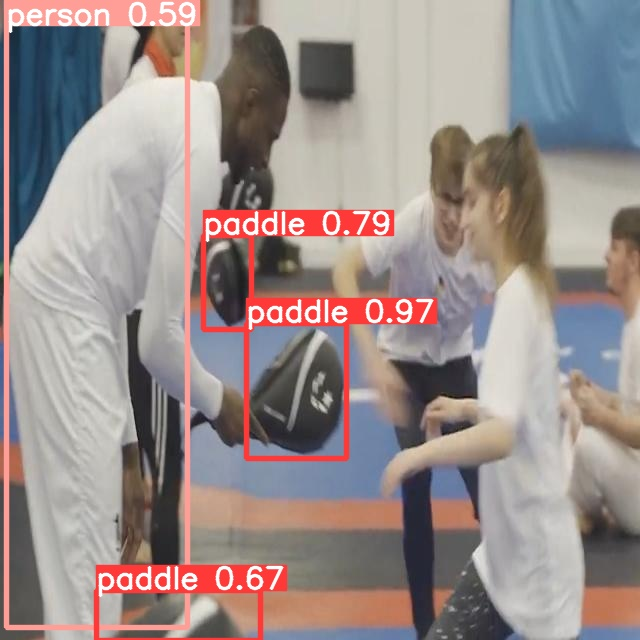

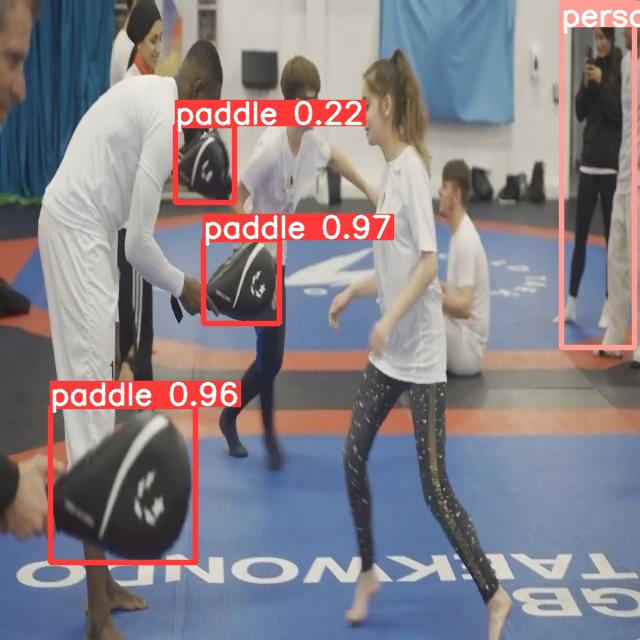

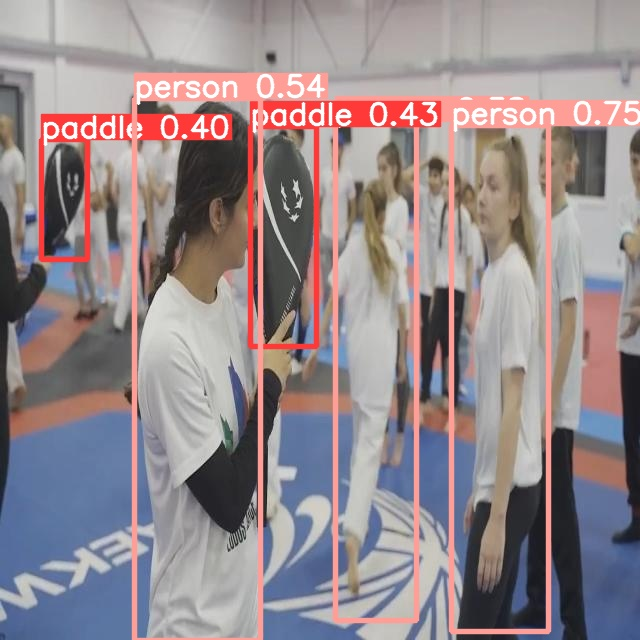

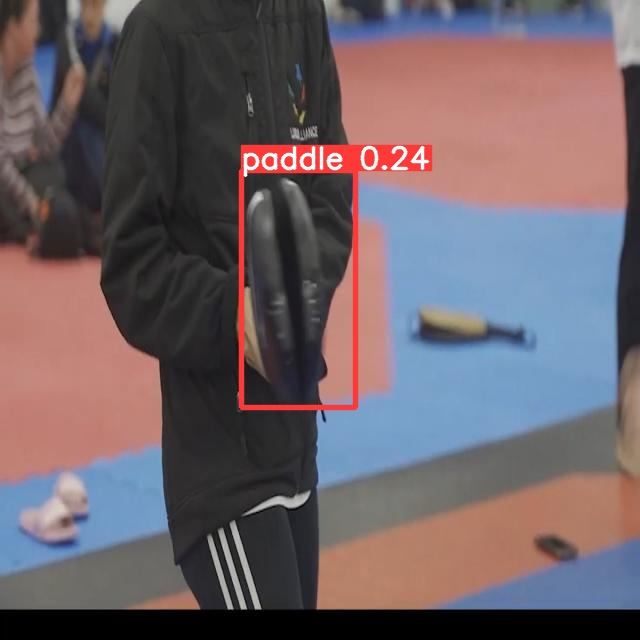

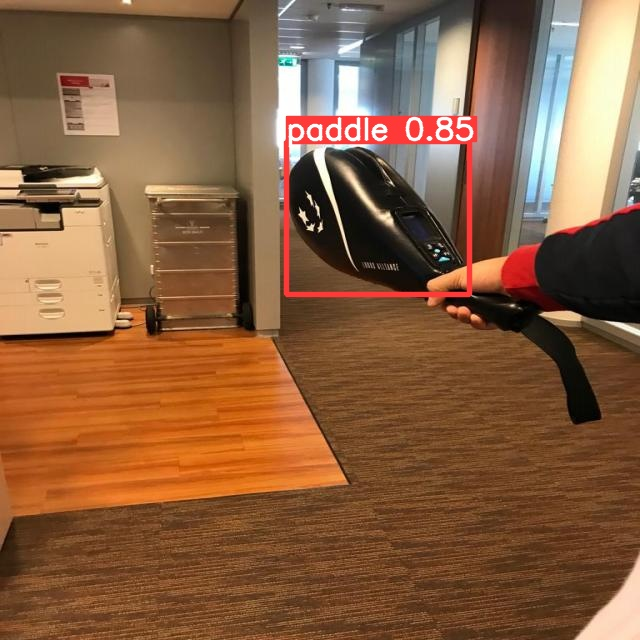

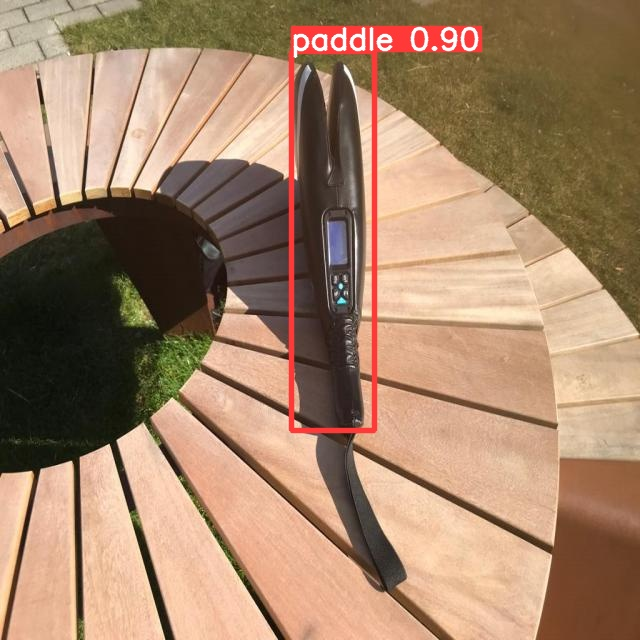

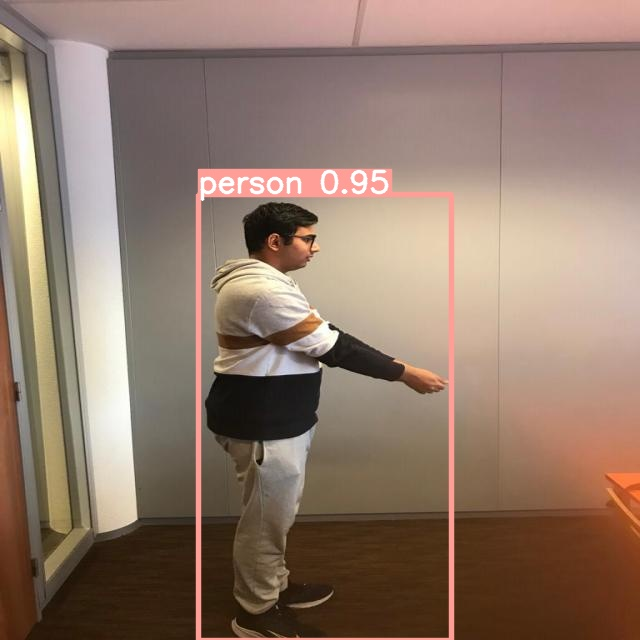

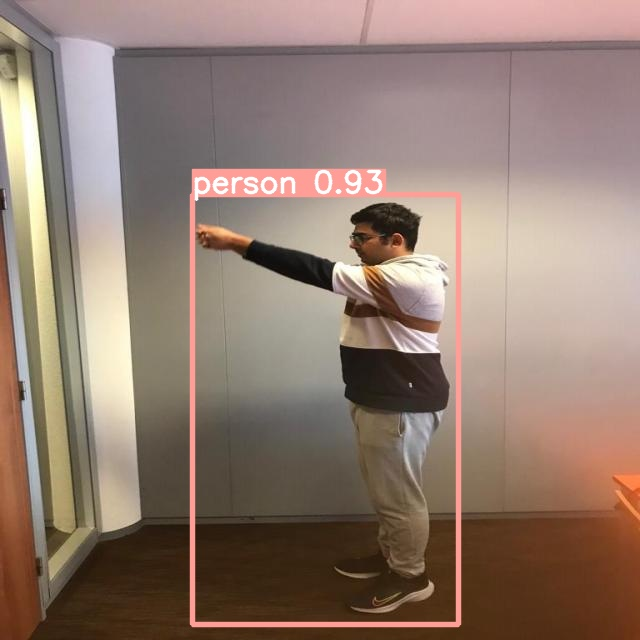

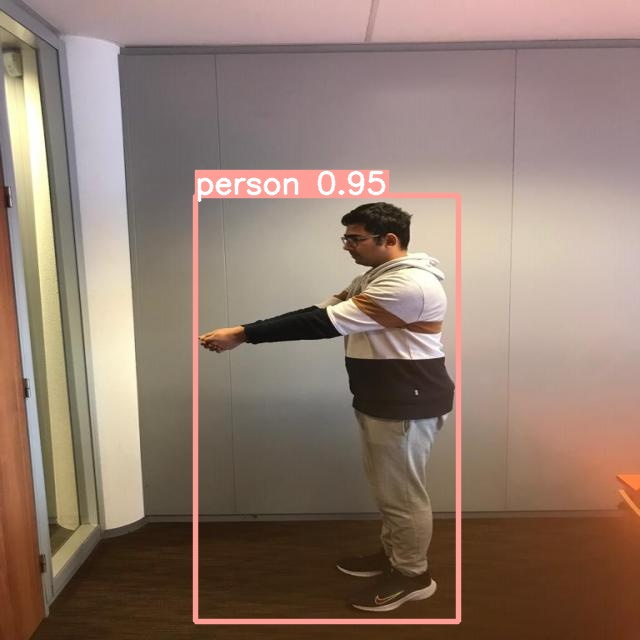

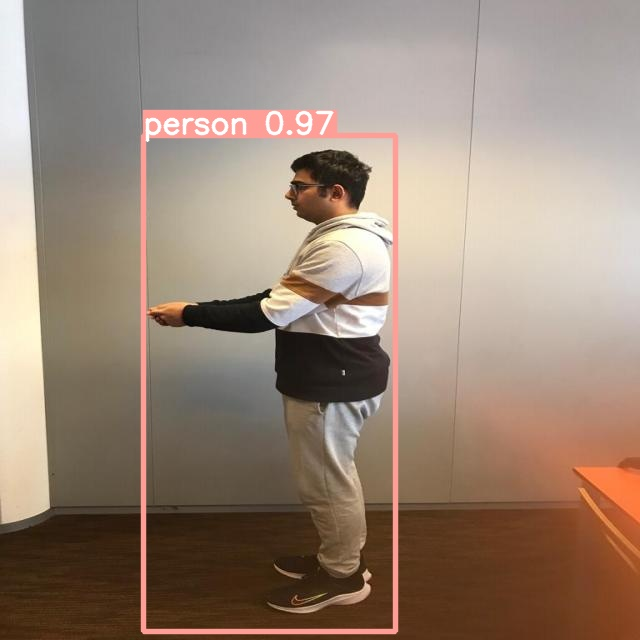

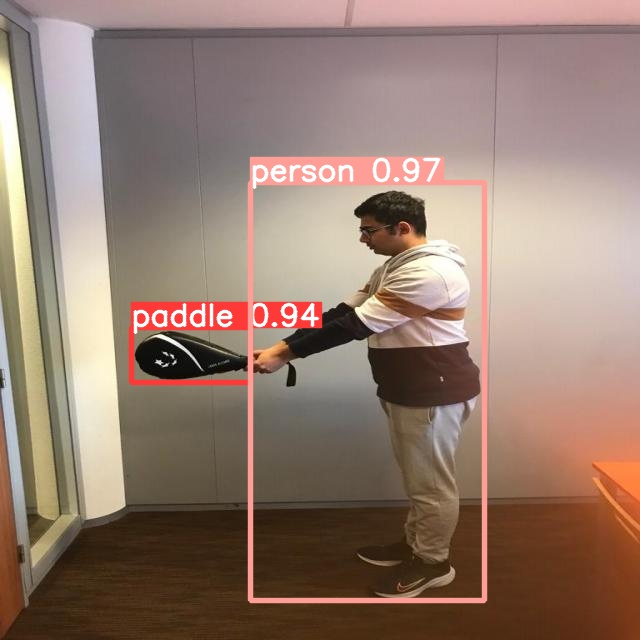

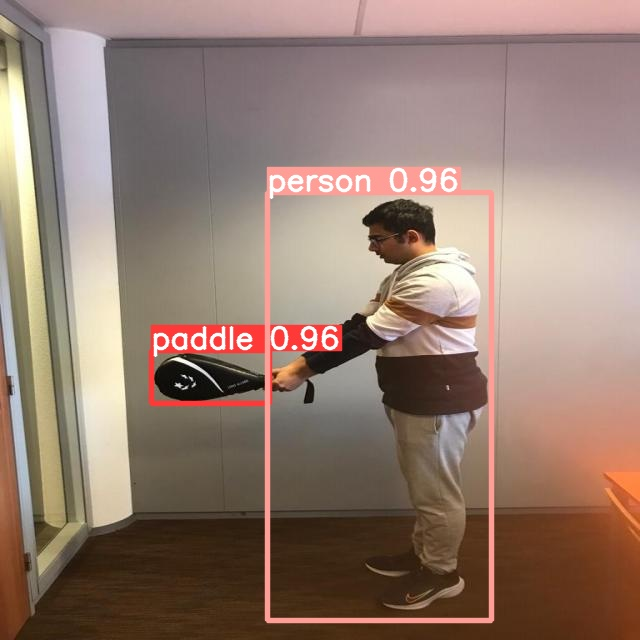

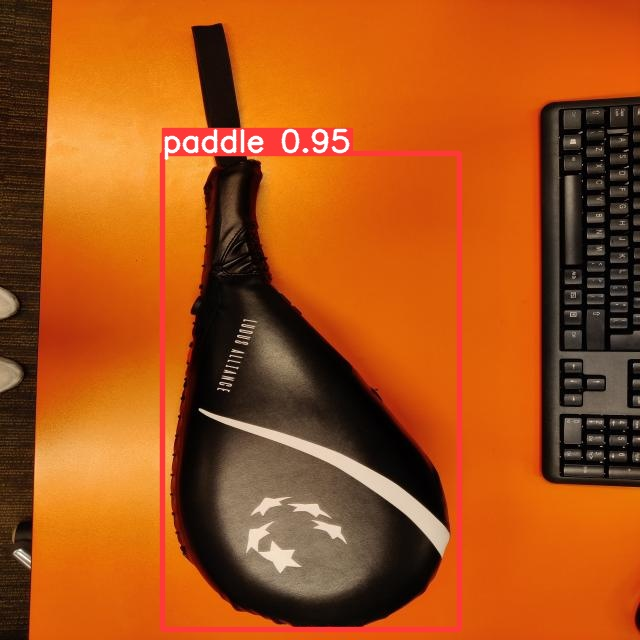

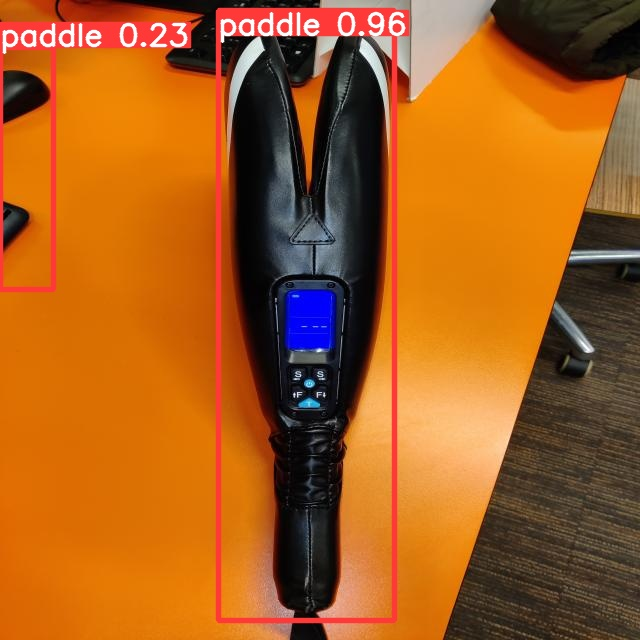

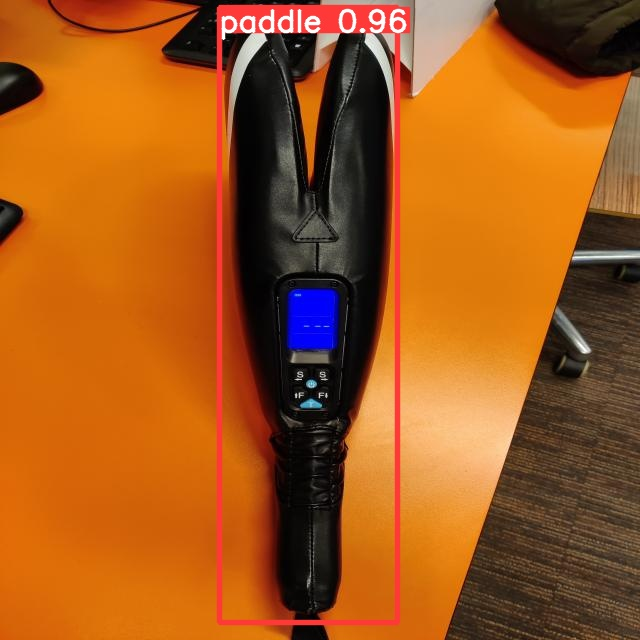

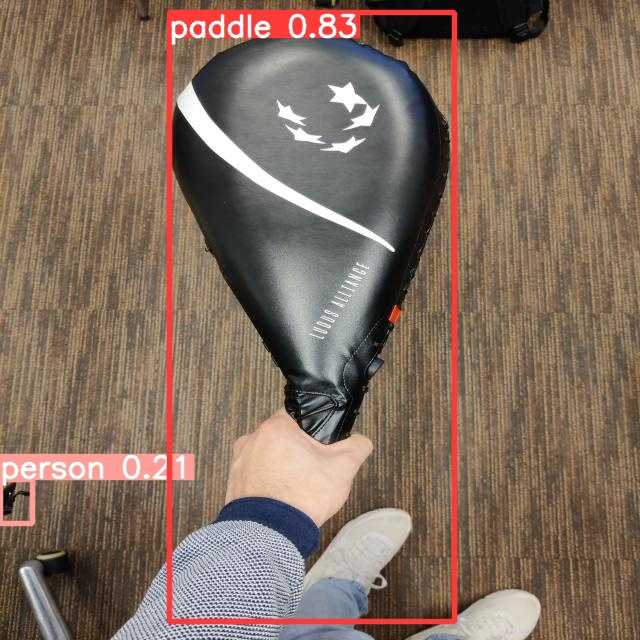

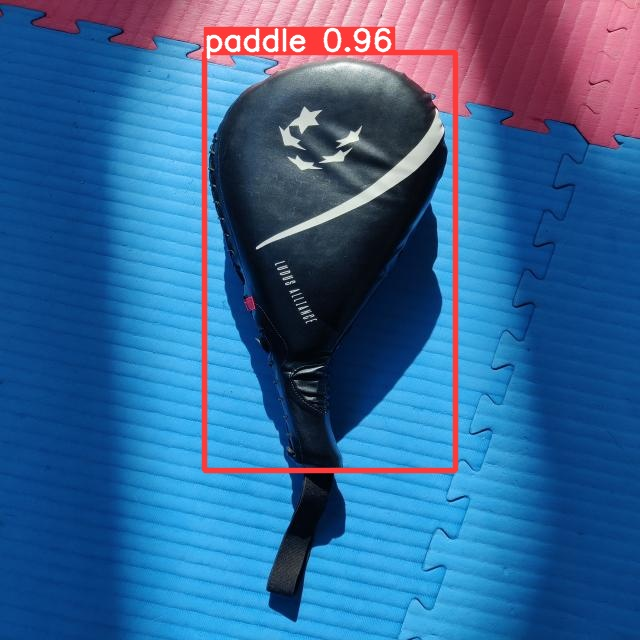

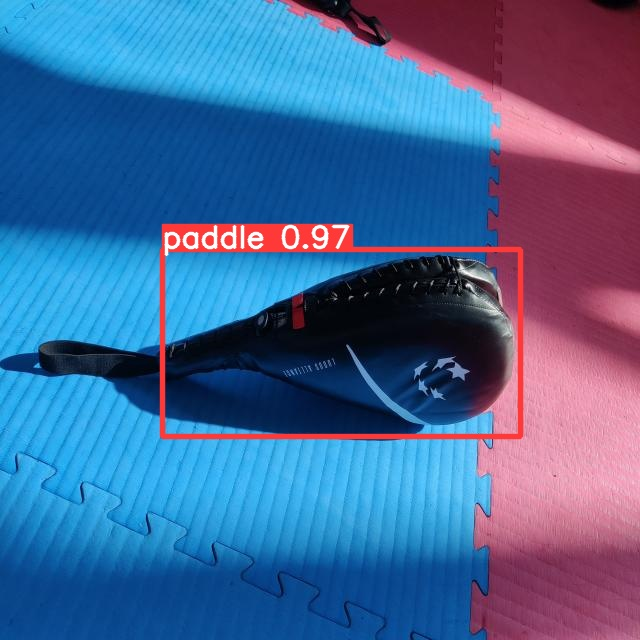

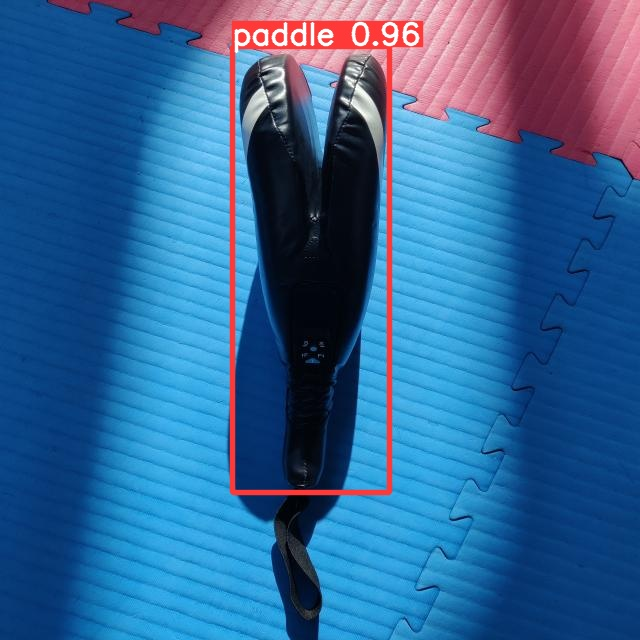

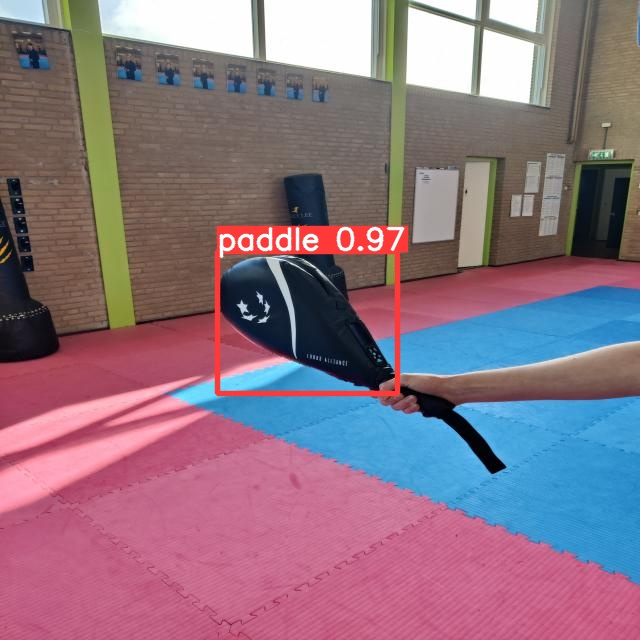

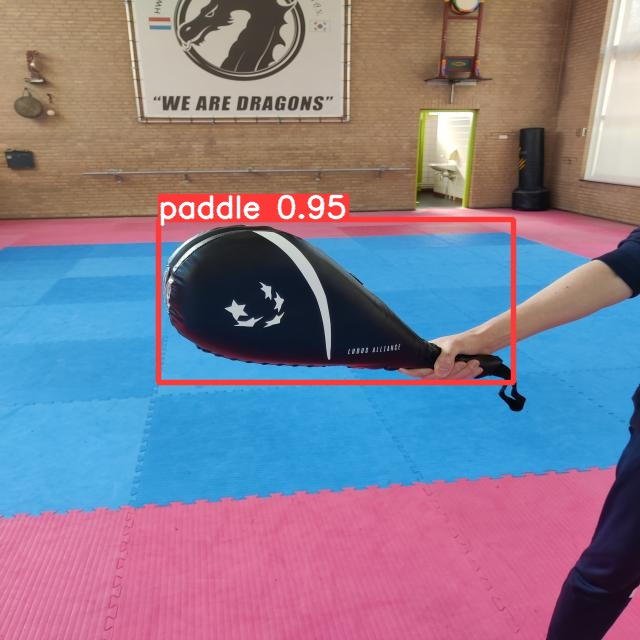

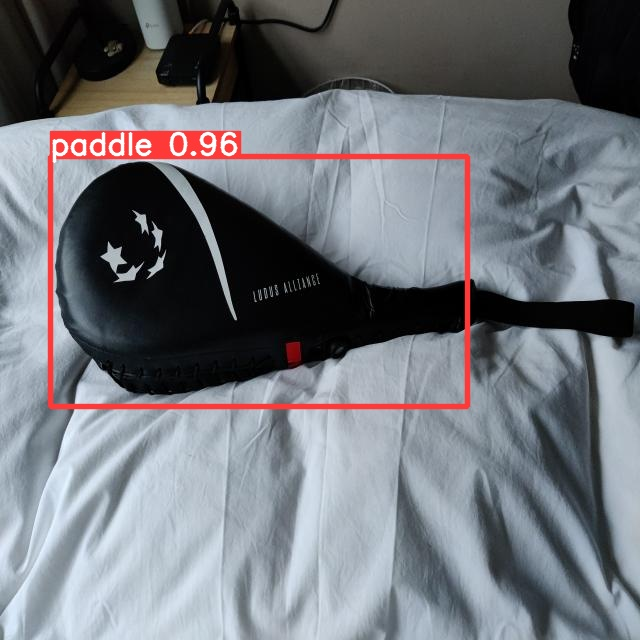

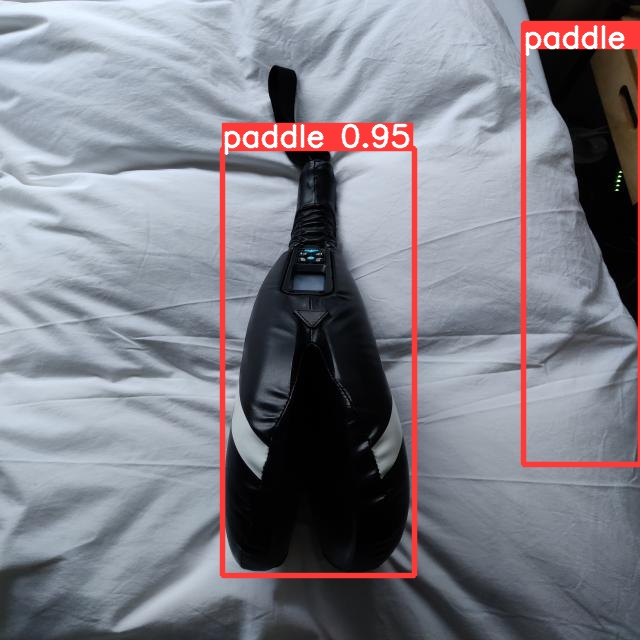

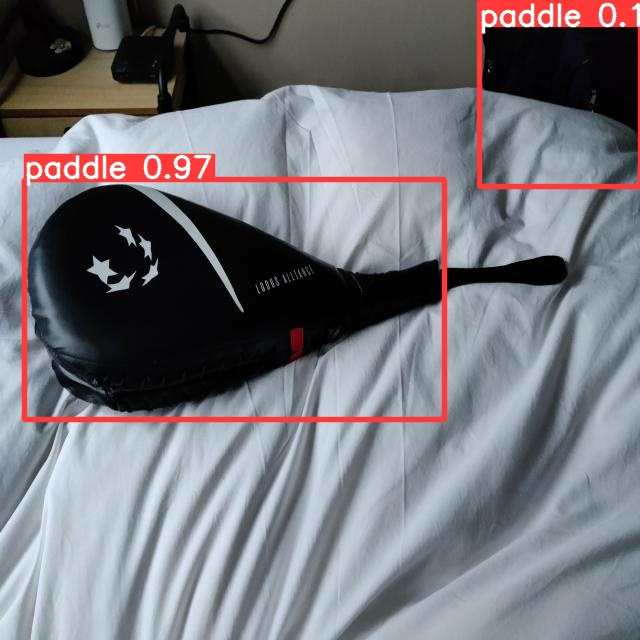

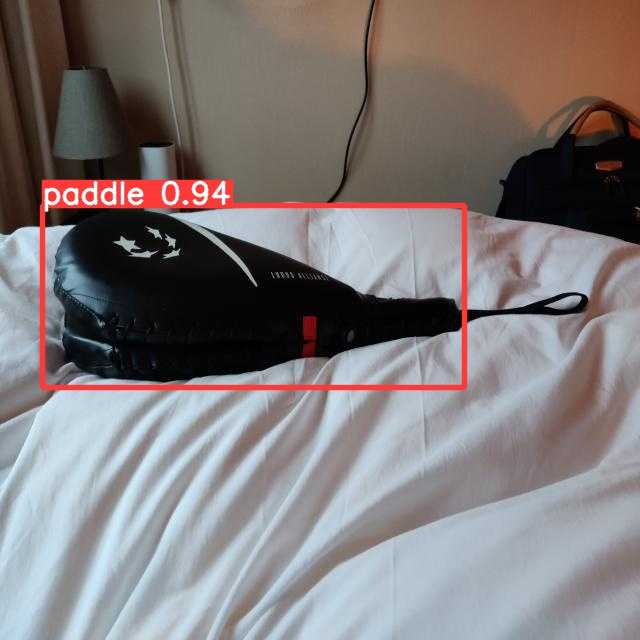

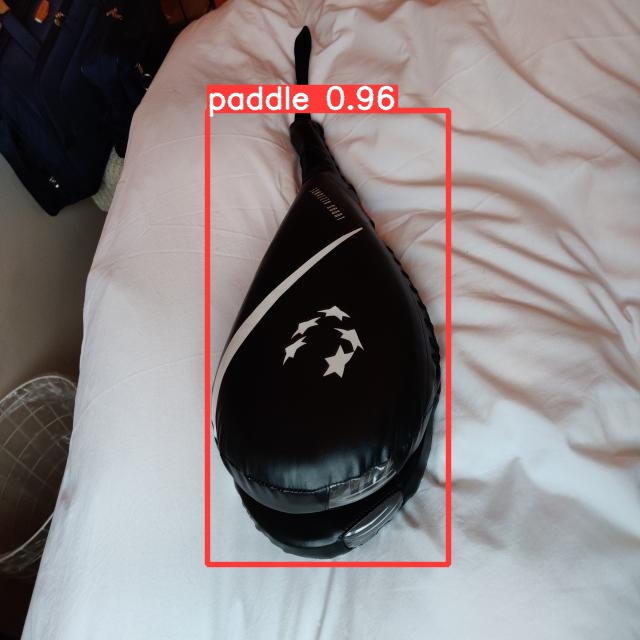

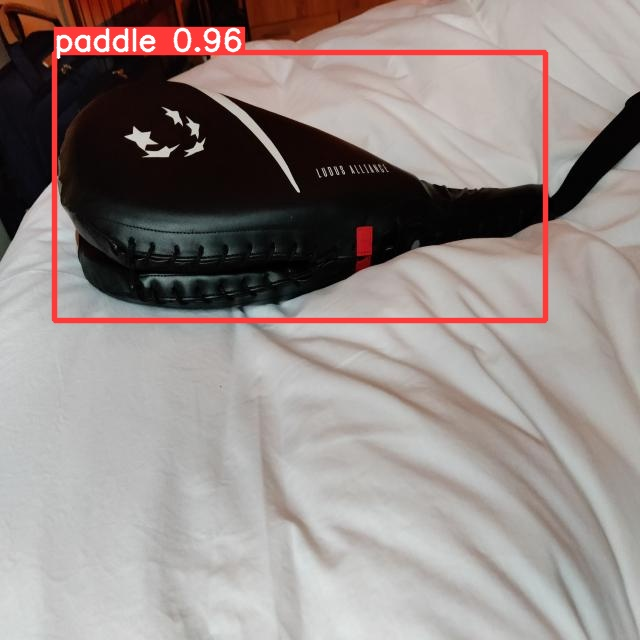

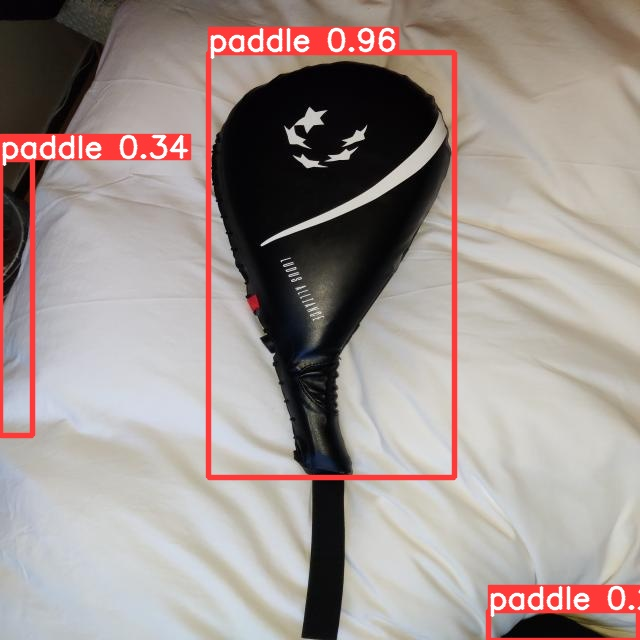

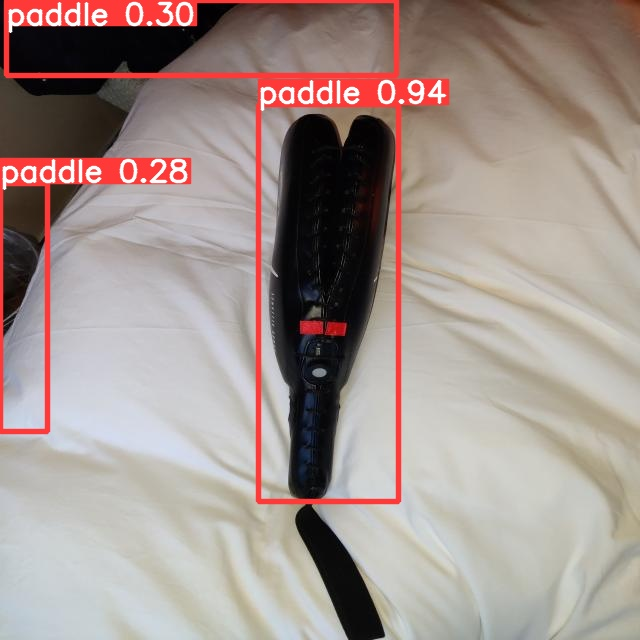

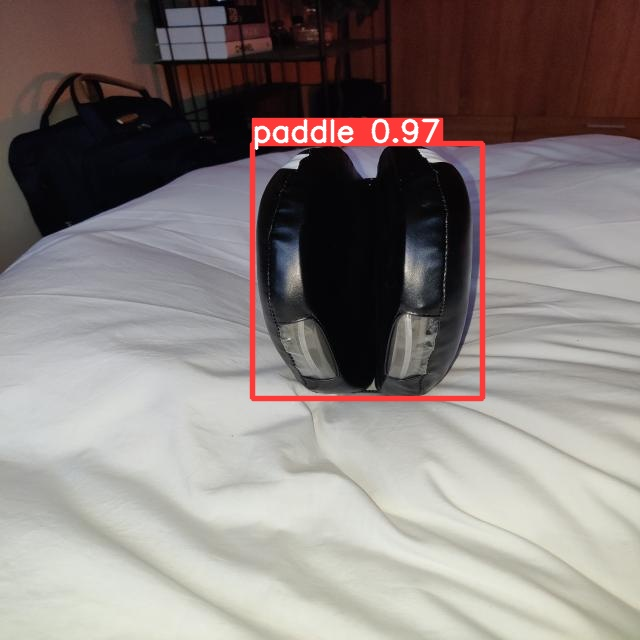

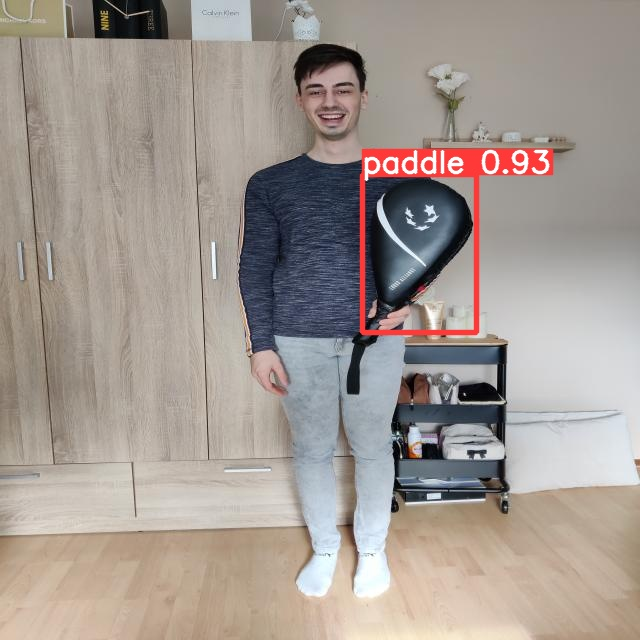

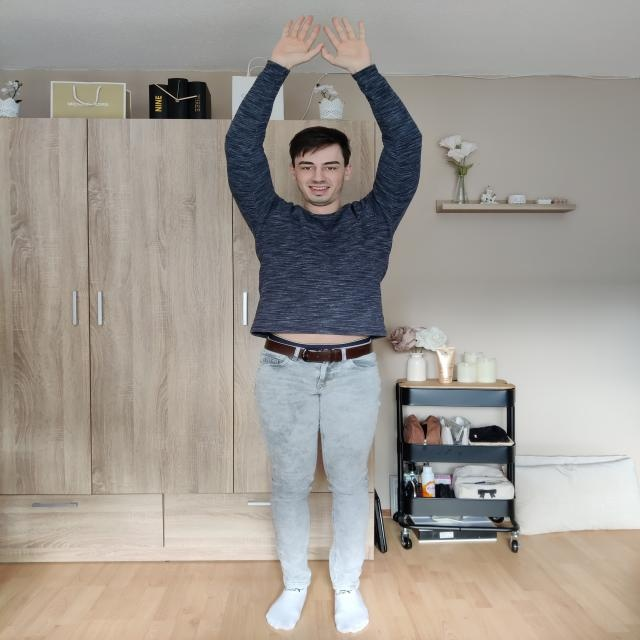

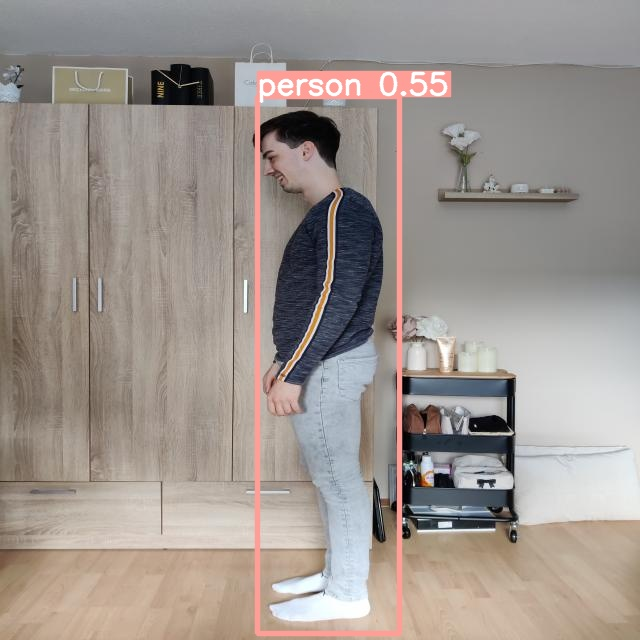

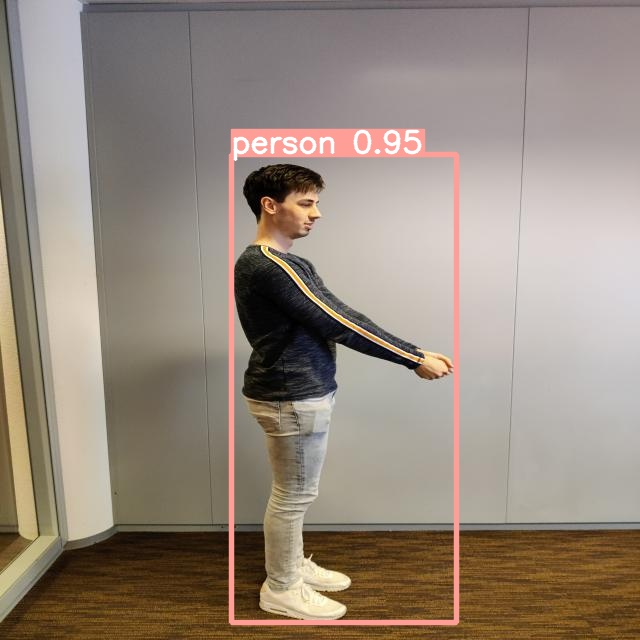

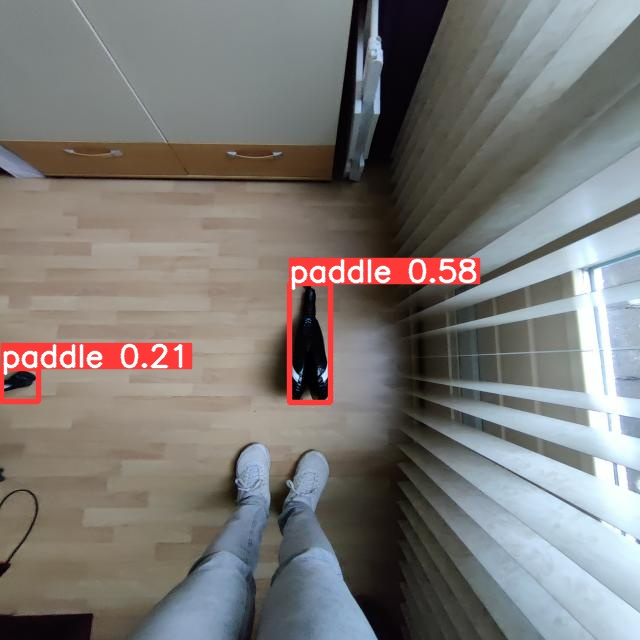

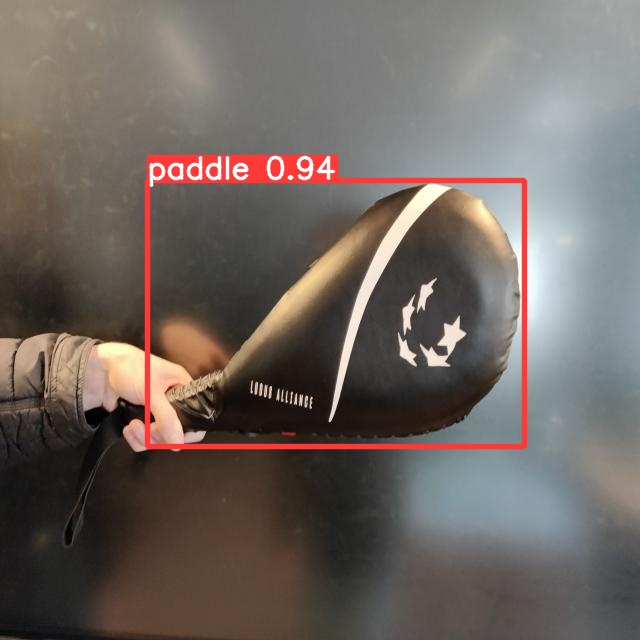

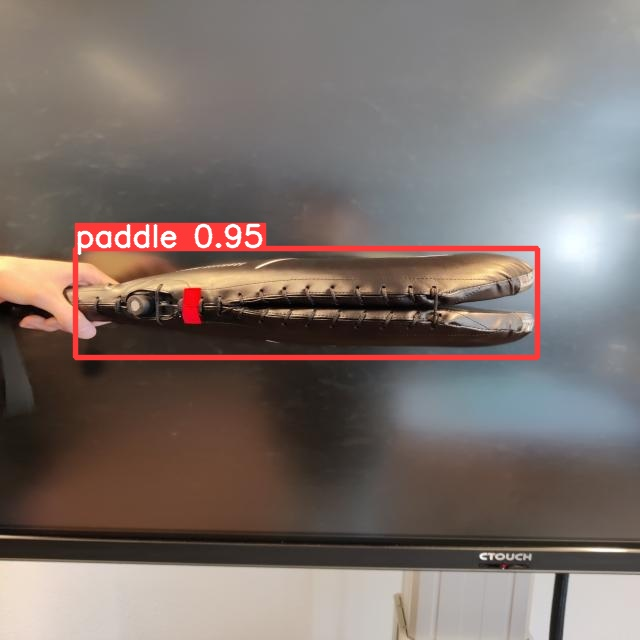

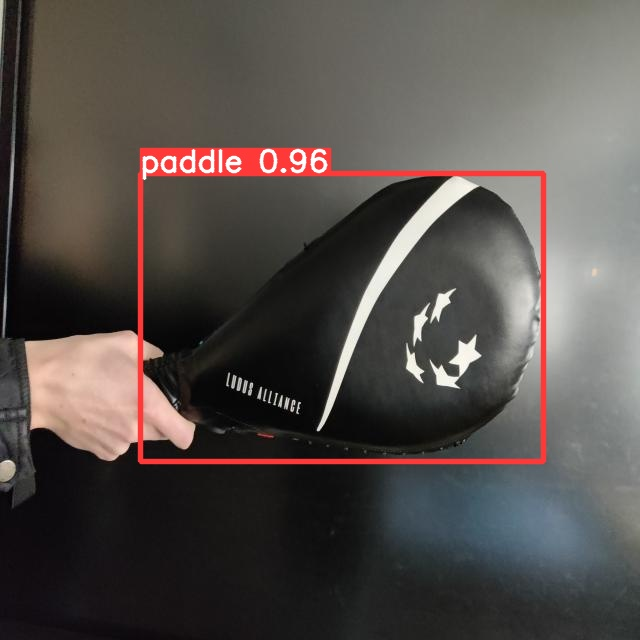

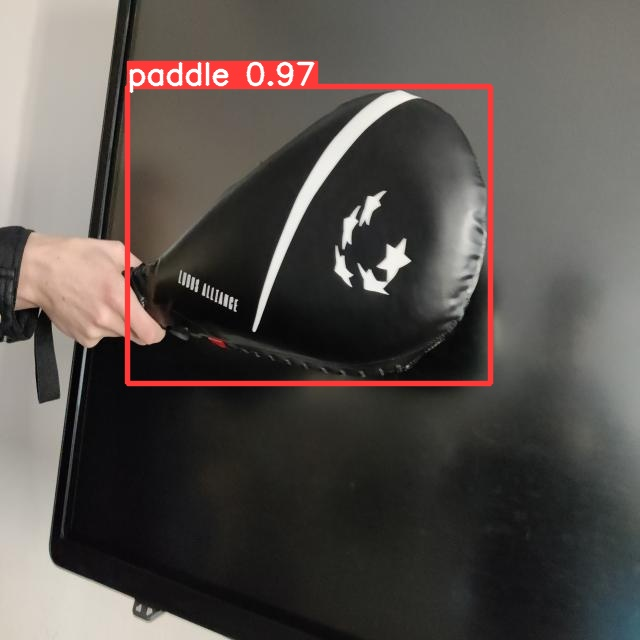

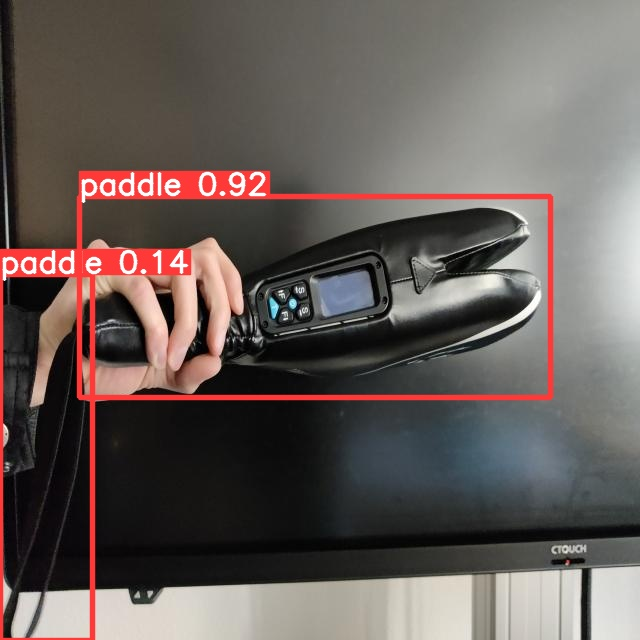

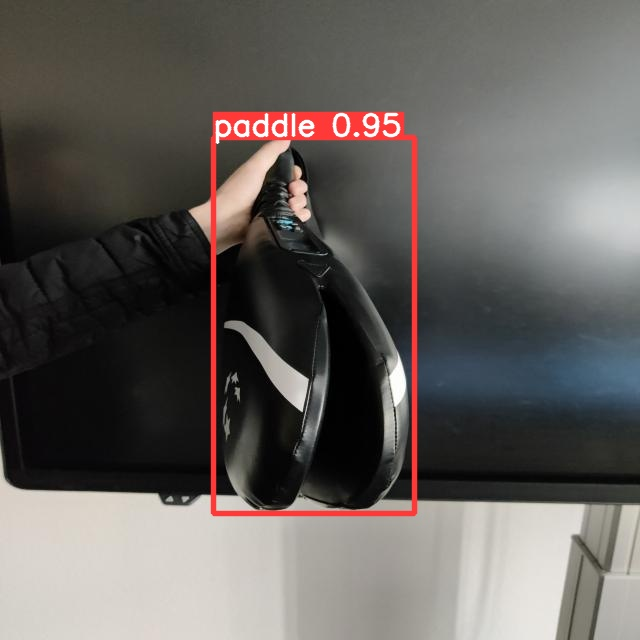

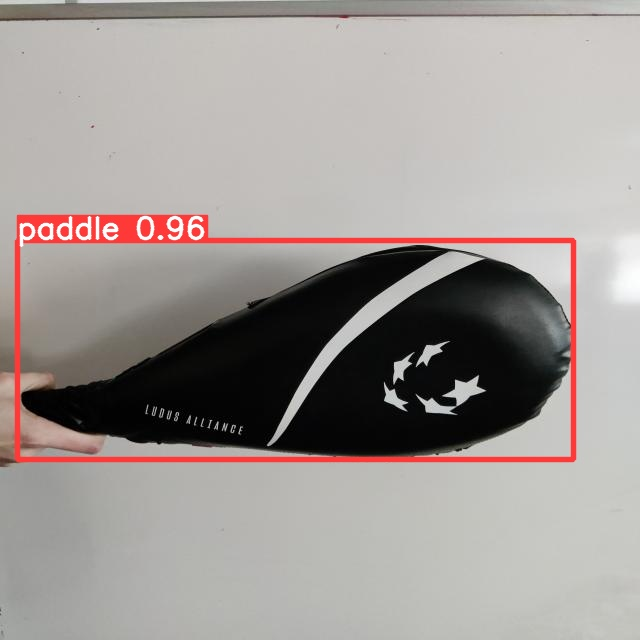

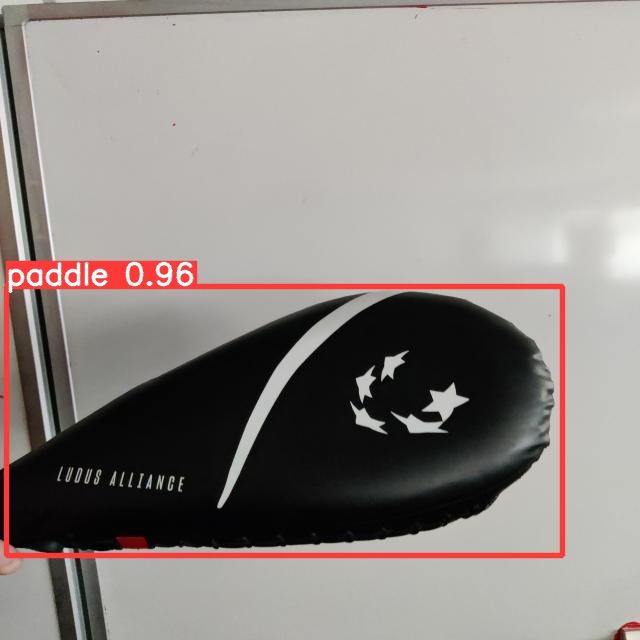

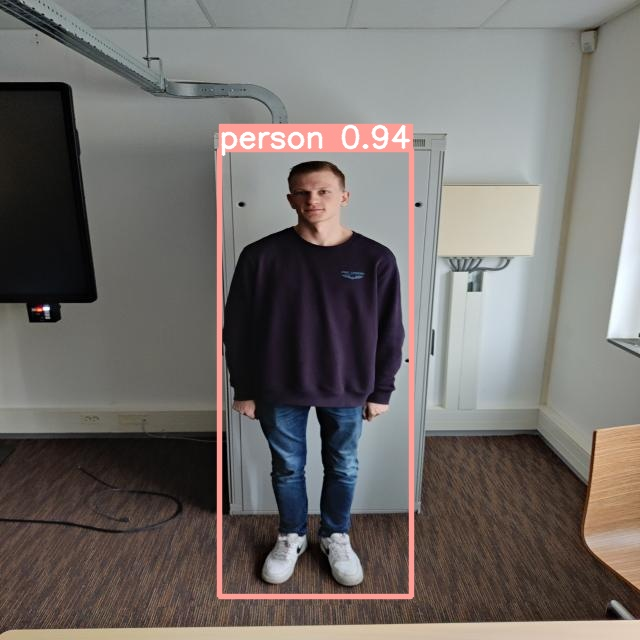

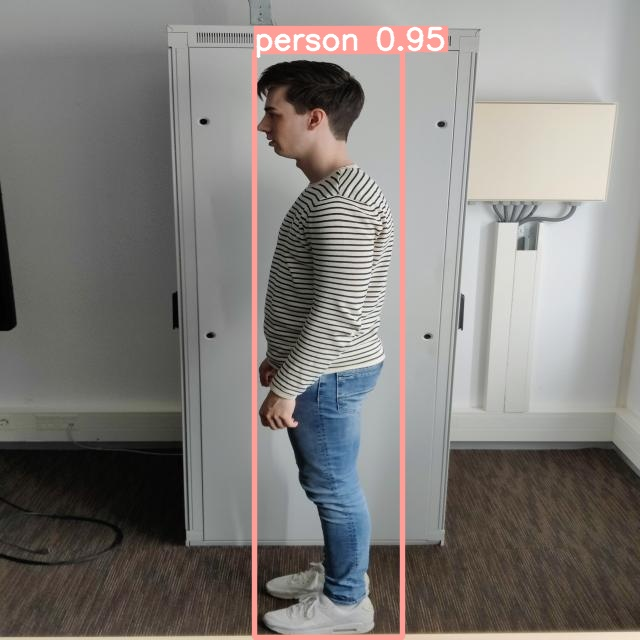

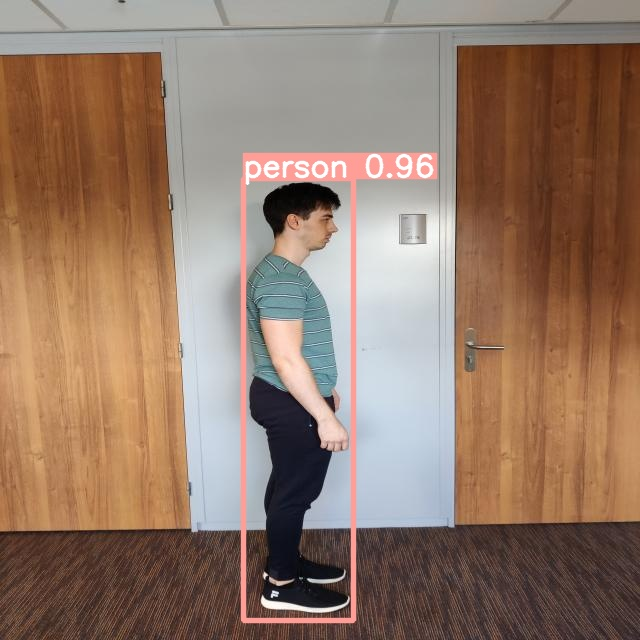

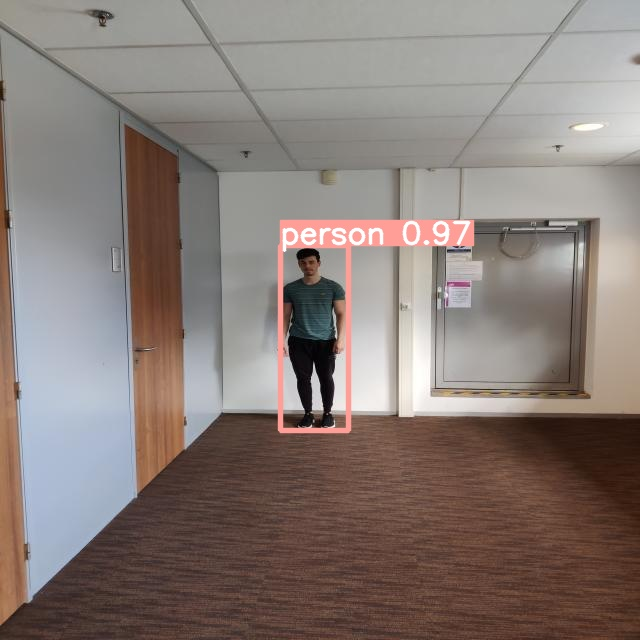

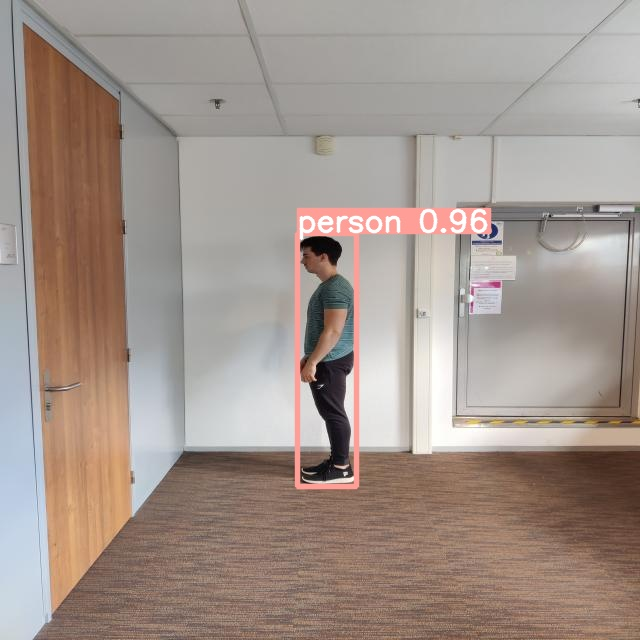

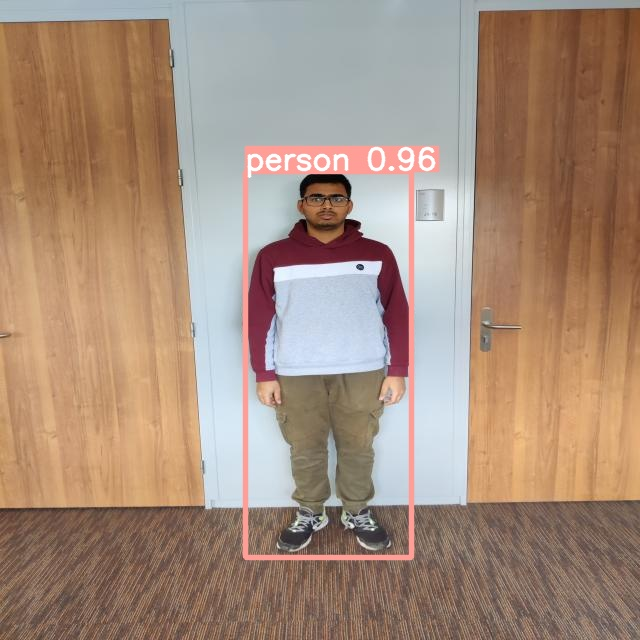

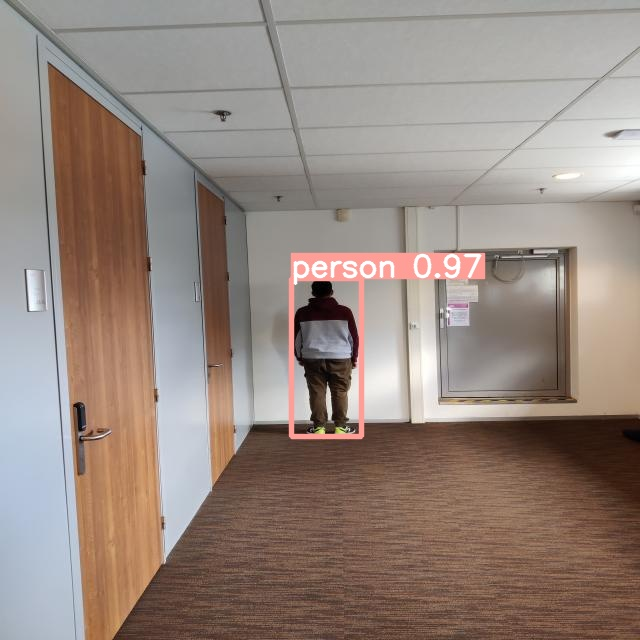

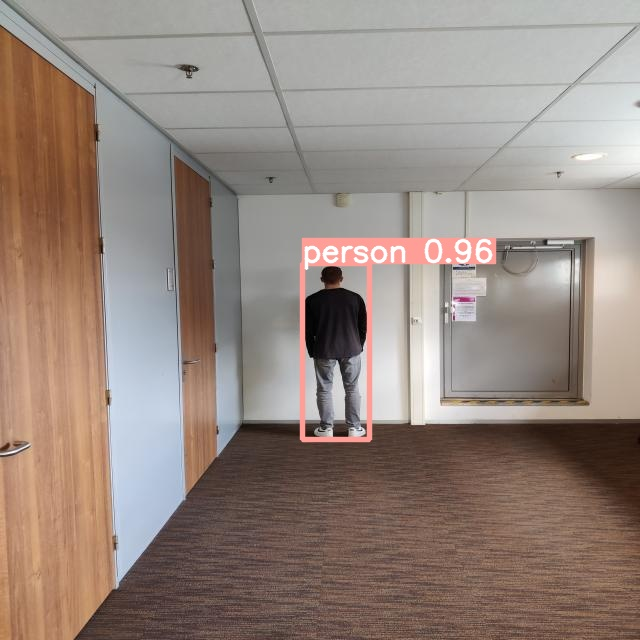

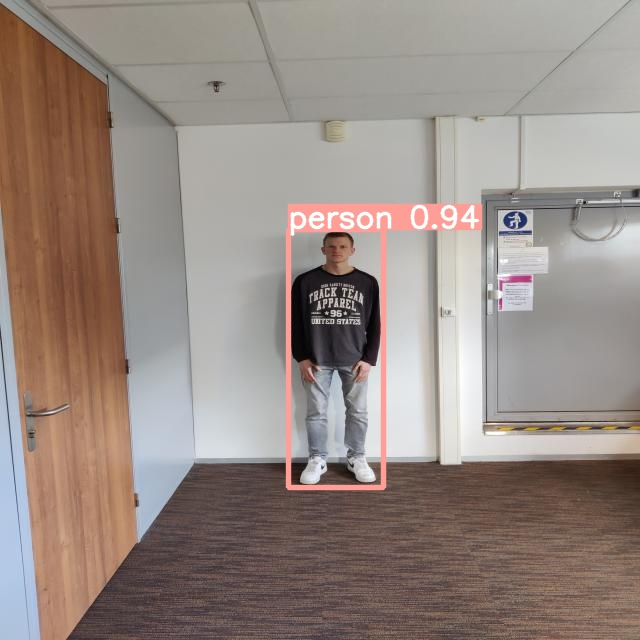

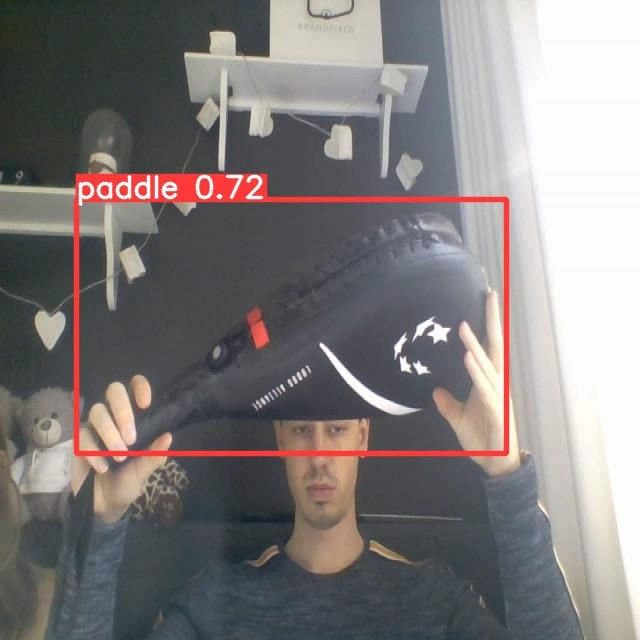

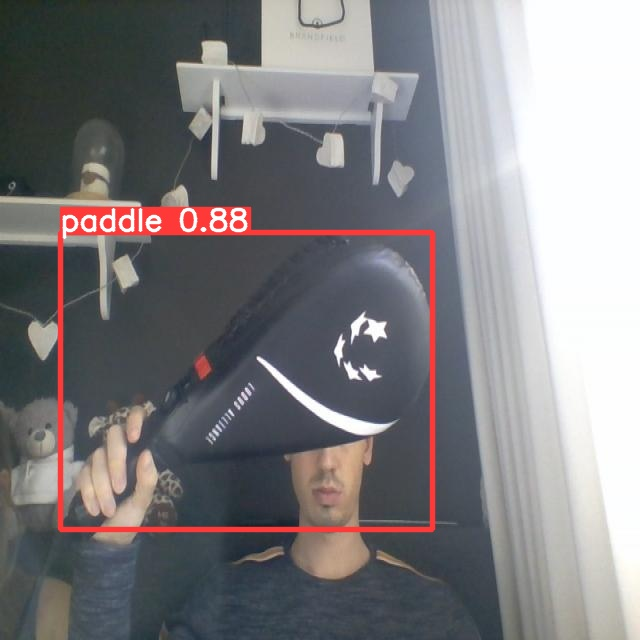

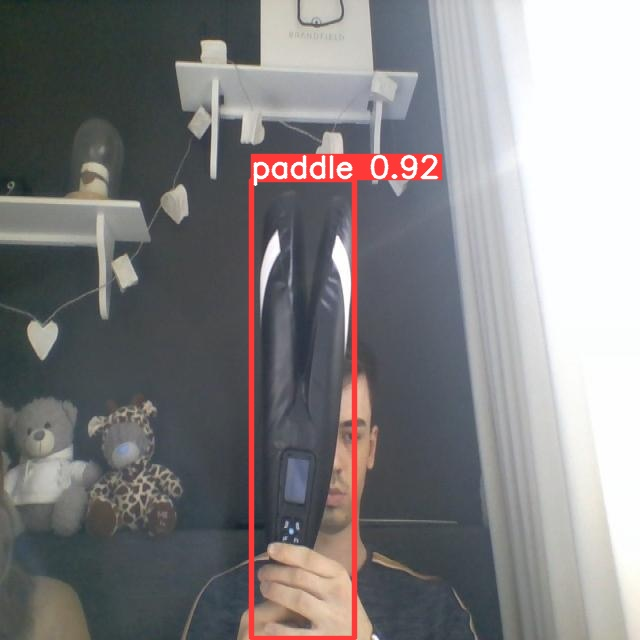

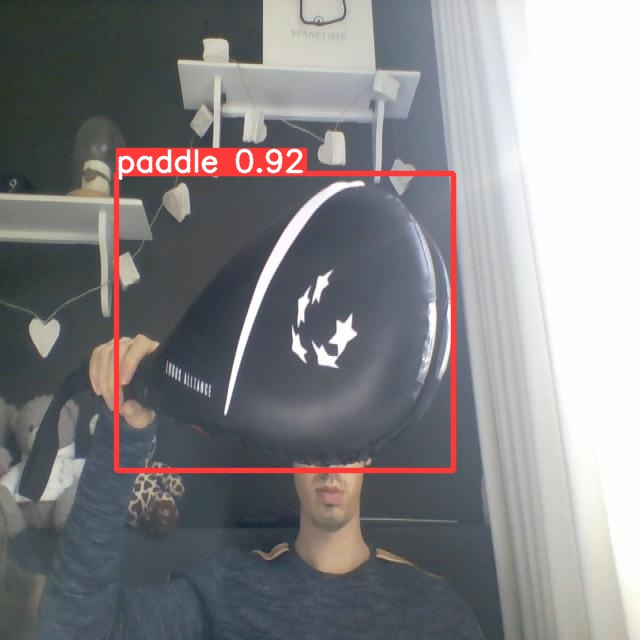

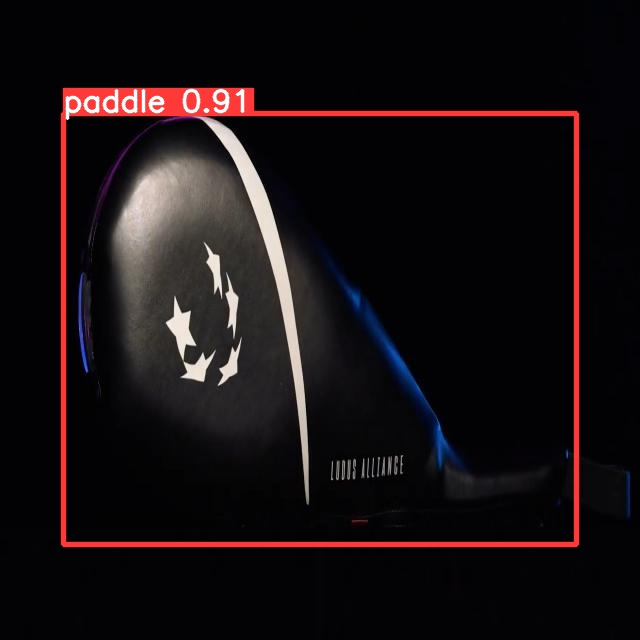

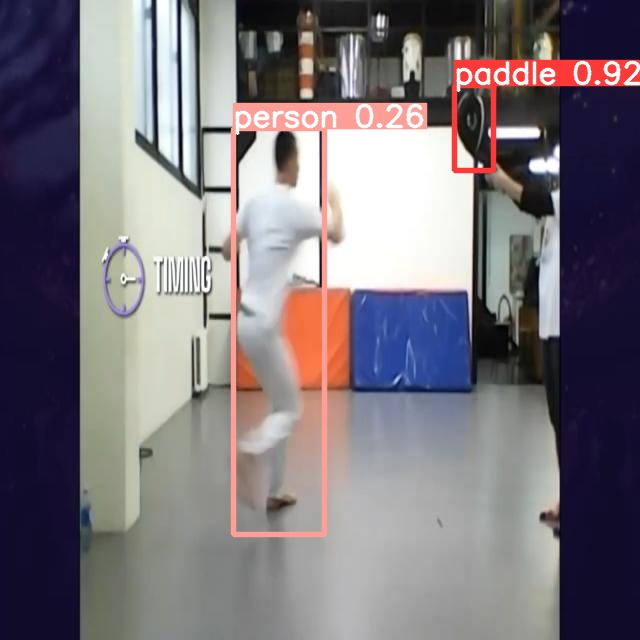

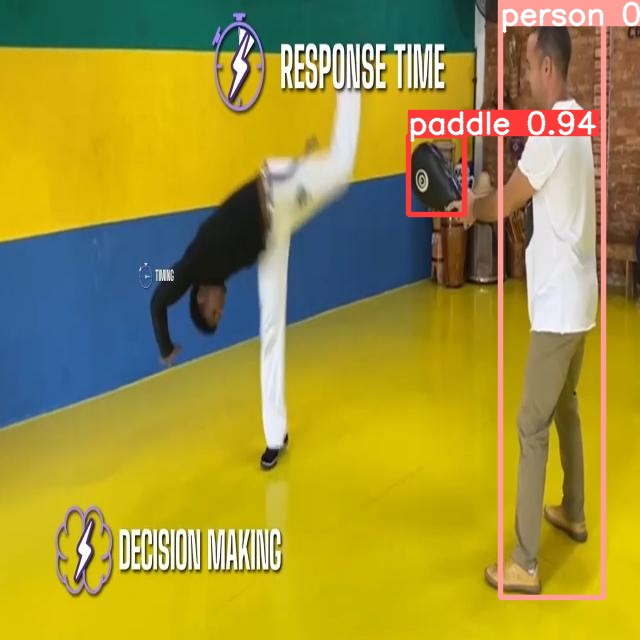

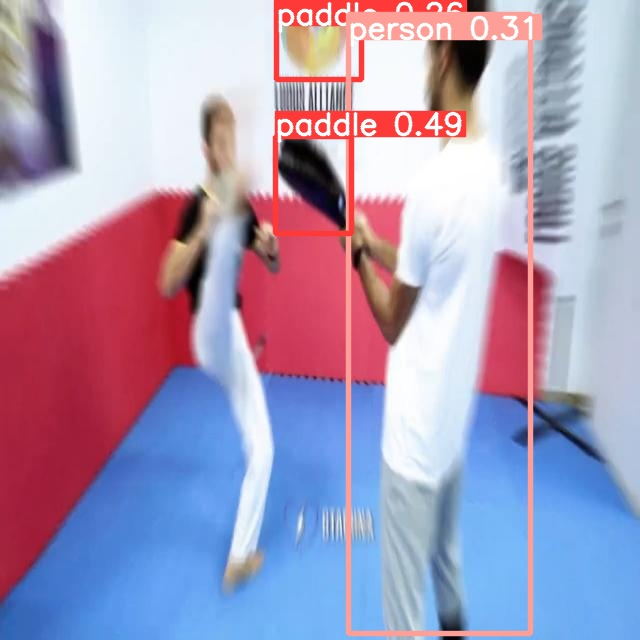

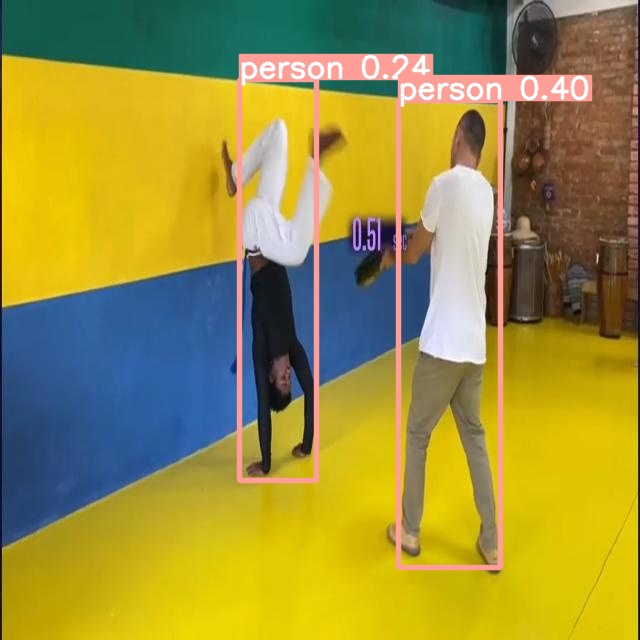

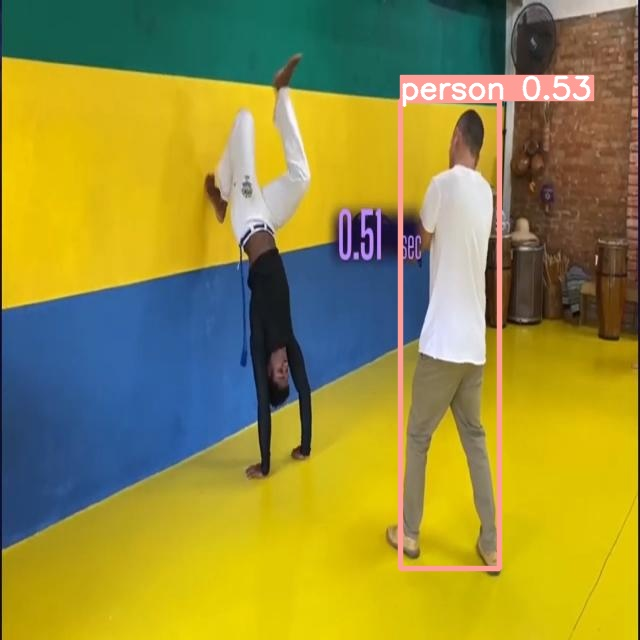

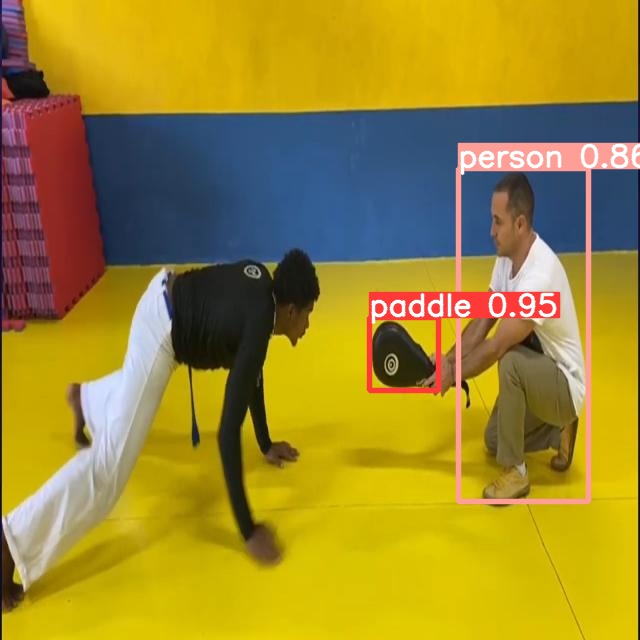

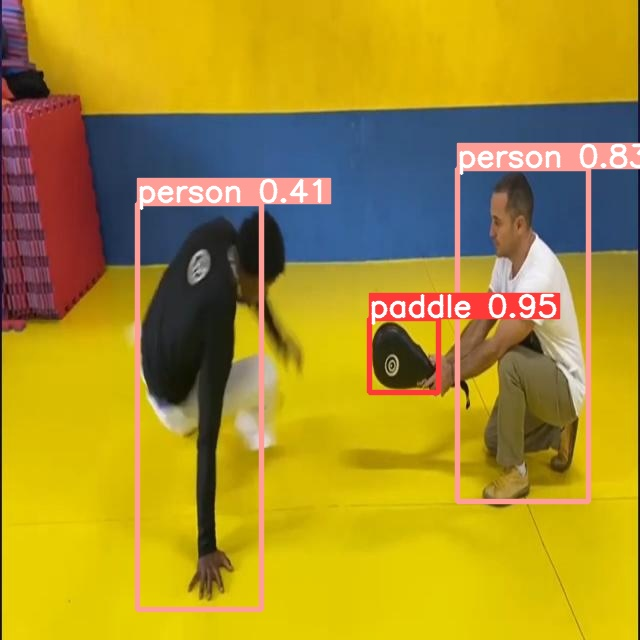

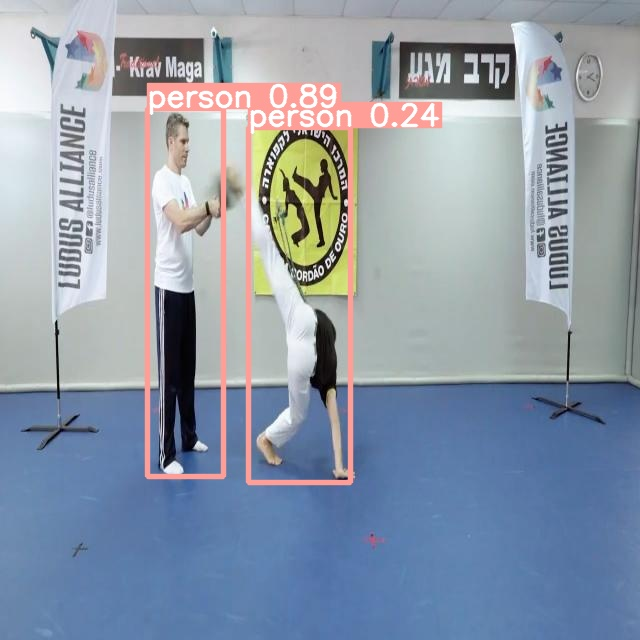

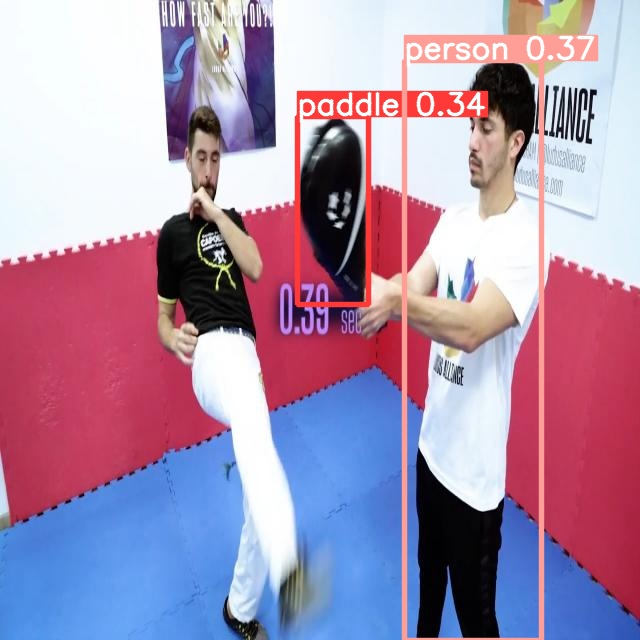

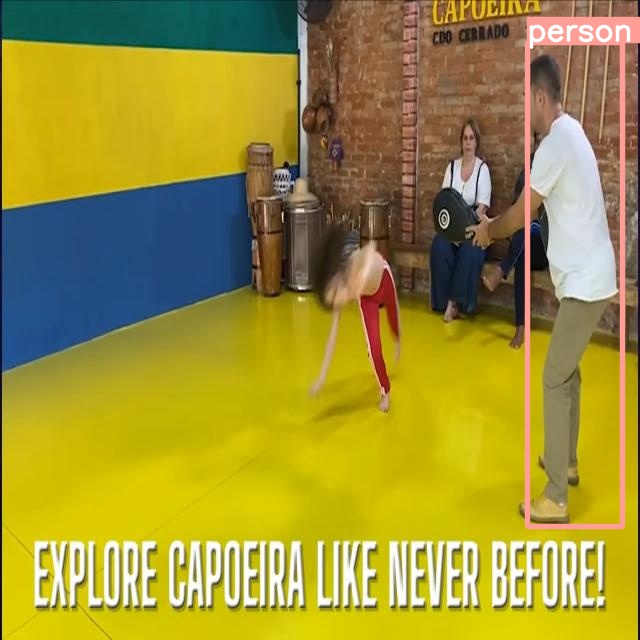

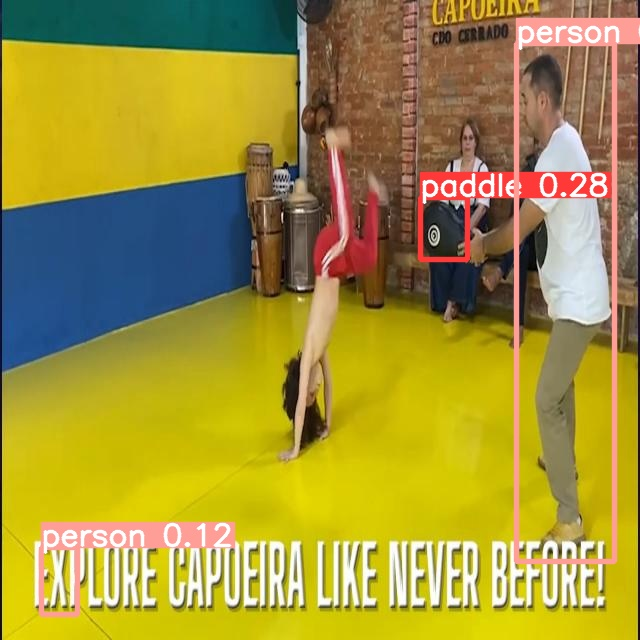

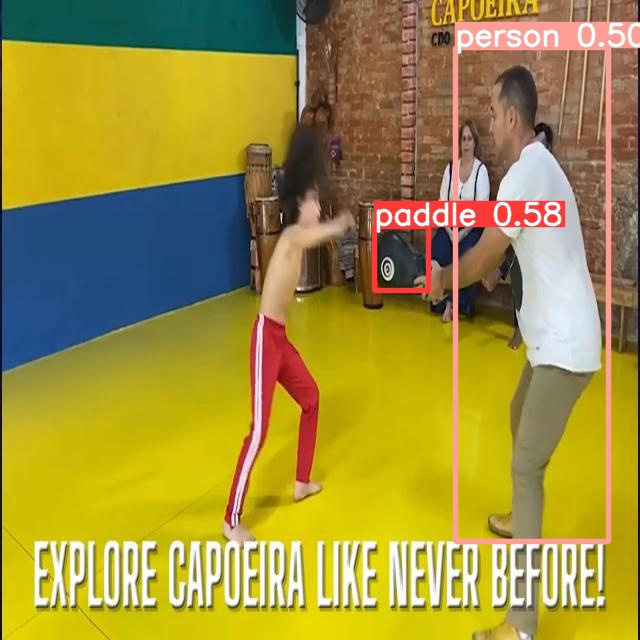

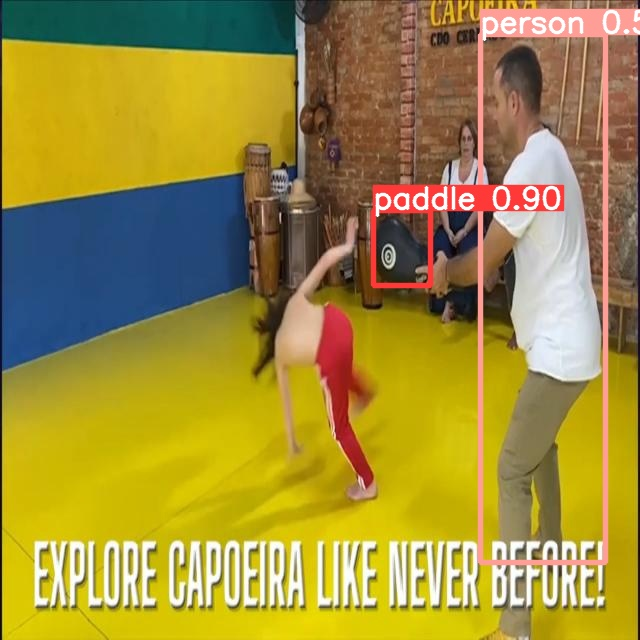

In [11]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(r'D:\Yolov5Course/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")